# Exercise 0b: Elementary Program Structures in Python, Part II 

In this short exercise some elementary steps for plotting, display and loading of external data will be explained.

In [1]:
import numpy as np    # import the numerical python module
from numpy import pi  # so we can address np.pi simply as pi

## Visualization of Data: Curve Plotting with Matplotlib

As a first step we need a simple visualization to recognize trends in data or to adapt model functions. In Python you will choose the mature plot interface [Matplotlib](http://matplotlib.sf.net). From this, we import the submodule `PyPlot` (per default abbreviated as `plt`) to create ready-to-publish plots:

In [2]:
import matplotlib.pyplot as plt # import the standard plotting module

With the following IPython Magic command (these always start with `%`...) the plots will get some more functionality (zoom, save option)
> **Hint:** When using the Notebook style the plot windows should be closed always after use klicking on the button on the top right. All subsequent plot commands will be directed into this open window otherwise.

In [3]:
%matplotlib notebook

Or you can use the display option 'inline' (embedded), which is the default.

> ```python
> %matplotlib inline
> import matplotlib
> # to fix parameters like the plot window size for all following plots
> matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
> import matplotlib.pyplot as plt
> ```

In [4]:
%matplotlib inline

**Domain**

To plot a function we first need a domain, i.e. a set of discrete x values. You can use a one-dimensional array (vector) for this:

In [5]:
np.arange(1.0, 10.0, 1.0) # Values from 1 to 9 with a distance of 1

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

It is recommended to use `linspace()`, which includes the starting and end points, and allows for a precise definition of the number of values:

In [6]:
np.linspace(0,10, 11) # from 0 to 10 with a step of 1.
# Per default (without writing the 11) 50 numbers are created

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

As mathematical functions in NumPy operate on the full elements, one can simply hand over the vector (or a matrix etc.). This executes much faster than doing the assignment with a self-programmed loop.

In [7]:
x = np.linspace(0,2*pi,100) # angle in radians from 0 - 2 pi
y = np.sin(x)

In [8]:
y2 = np.sin(x**2)

**`plot`** You just pass the x and y data, as well as a multitude of optional arguments for configurating the display.

>Try it out: When the x data are missing, the indices of the y data are taken as abscissa values:

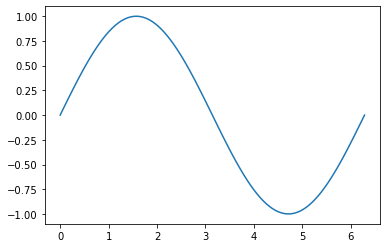

In [9]:
plt.plot(x,y)
plt.show() # here this command is not necessary. In general you should use it to finalize the plot.

Some help for the plot command

In [10]:
# Hints to the functionality of 'plot'
plt.plot?

**`scatter`** A plot for creating isolated data points

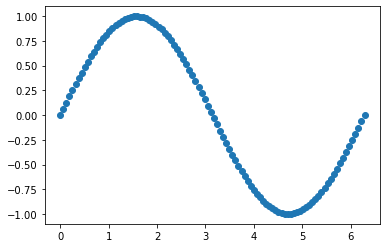

In [11]:
plt.scatter(x,y)
plt.show()

In [12]:
#plt.scatter?

**`errorbar`** Like `scatter`, but with additional error bars for x and y

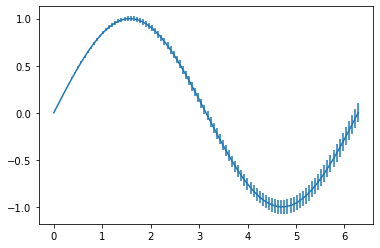

In [13]:
yerr = np.linspace(0,0.1,100)
#yerr = np.ones(100)*0.1
plt.errorbar(x, y, yerr) # array of error bars as additional parameter
plt.show()

In [ ]:
#plt.errorbar?

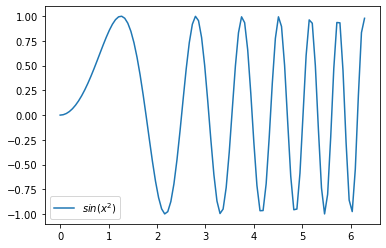

In [14]:
# Don't forget: close plot windows above!
plt.plot(x, y2, label='$sin(x^2)$')
plt.legend(loc='lower left')
# loc = center/lower/upper {+ right/center/left}   or: loc = 'best'
plt.show()

### <font color='red'>TASK</font> Manual 'Fit'

Function $f(x)=sin(x)^2$ exhibits exactly the half period (double frequency) of $sin(x)$. Show graphically the coincidence with function $g(x)=sin(2∗x)$ by trying to shift $f(x)$ along $x,y$ directions and stretching with a factor.

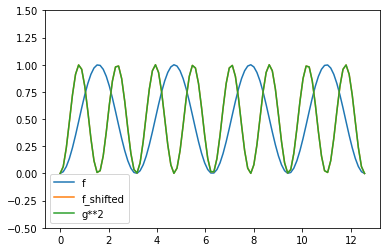

In [58]:
x = np.linspace(0, 4*pi, 100)
f = np.sin(x) * np.sin(x)
g = np.sin(2*x)
f_shifted = 4*f*(1-f)
plt.plot(x, f)
plt.plot(x, f_shifted)
plt.plot(x, g**2)
plt.ylim(-0.5, 1.5)
plt.legend(["f", "f_shifted", "g**2"], loc='lower left')
plt.show()

### Plot options

In PyPlot and MatPlotLib a multitude of options are available to create nice images for publications or theses. Many examples can be found in the [MatPlotLib gallery](http://matplotlib.org/gallery.html).

In the example below, additionally
- a legend is created `plt.legend()` and placed bottom left, for which you need the `label=...` parameters
- a title is generated
- the x and y domains are adjusted with `xlim` and `ylim`
- the axes are labeled (`xlabel`) under usage of LaTeX symbols (encapsulated in $$)
- the plot is saved (when `%matplotlib notebook` mode is on, you can do this also with a window button)

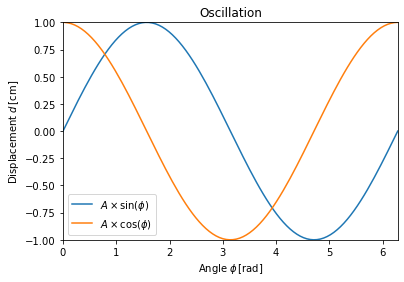

In [29]:
x = np.linspace(-2*pi, 2*np.pi, 200)
# Plots with labels for legend
plt.plot(x, np.sin(x), label=r'$A \times \sin(\phi)$') # r supports LaTeX
plt.plot(x, np.cos(x), label=r'$A \times \cos(\phi)$')
# Title
plt.title('Oscillation')
# Axis limits
plt.xlim(0, 2 * np.pi)
plt.ylim(-1, 1)
# Axis labels
plt.xlabel(r'Angle $\phi \, [\mathrm{rad}]$')
plt.ylabel(r'Displacement $d \, [\mathrm{cm}]$')
# Legen
plt.legend(loc='lower left')
# Save
plt.savefig('my_plot.png')
plt.show()

### Mathematical functions

In addition to the predefined math functions from the module `math`/`numpy` you can program your own ones.

> Also all other routines defined in Python are called functions, also when not explicitly calculating numerical values.

In [ ]:
# sinus cardinalis
def sinc(x):
    value = np.sin(x)/x
    return value

In [ ]:
x = np.linspace(-7*pi, 7*pi, 200)
y = sinc(x)
plt.plot(x, y)
plt.show()

Not all of your defined functions will be  "vectorizable", i.e. are able to accept `x` value arrays.
Example: For piecewise defined functions it is then necessary to define x-Intervals and interval functions with `np.piecewise()`.

In [ ]:
# The following does not work with vector 'x' (try!)
#def sinc2(x):
#    if x <= 0:
#        return 1
#    else:
#        return np.sin(x)/x


def sinc2(x):
    return np.piecewise(x, [x <= 0, x > 0], [1, lambda x: sinc(x)])
    # lambda x: sinc(x)  is a socalled inline function, the shortest definition

x = np.linspace(-5*pi, 5*pi, 200)
y = sinc2(x)
plt.plot(x, y)
plt.show()

## Save and load files
Most of the data can be stored in form of ASCII text files in form of lists, e.g. from Excel spreadsheets.
Every line represents a data set (e.g. an individuum, a time, a sample) with several columns (indicator, property1, property2, ...)

### Reading in text and numbers from same file

In your working directory should be the file "brainWeight.txt", which lists name, body and brain weight of different mammals. The file has the following form:

Column 1: Name: String <br/>
Column 2: Body weight: Float <br/>
Column 3: Brain weight: Float <br/>

As example for reading in a file the following script is used, which is already a little more complicated (no need to understand all details now). Later, we will read in exclusive numerical data with the command `loadtxt()`, which is much easier to use.

In [49]:
file = open("brainWeight.txt","r")
# https://mste.illinois.edu/malcz/DATA/BIOLOGY/Animals.html
name = [] # col. 1: name
x    = [] # col. 2: body weight [kg]
y    = [] # col. 3: brain weight [g]

for i in range(3):
    file.readline() # read in first three lines and forget them (file header)

for line in file:
    words = line.split() # split every line into a sequence of words
    name.append(words[0])# add col. 1 to name list
    x.append(words[1])   # add col. 2 to x values 
    y.append(words[2])   # add col. 3 to y values
file.close()

x = np.array([float(i) for i in x]) # convert numerical data into (float)
y = np.array([float(i) for i in y])

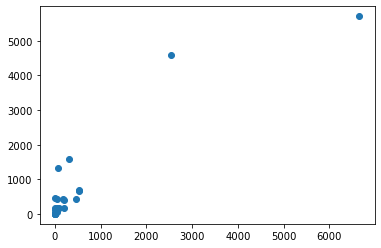

In [50]:
plt.plot(x,y,'o')
plt.show()

In [51]:
y

array([4.650e+02, 4.230e+02, 1.195e+02, 1.150e+02, 5.500e+00, 4.603e+03,
       4.190e+02, 6.550e+02, 1.150e+02, 2.560e+01, 6.800e+02, 4.060e+02,
       1.320e+03, 5.712e+03, 1.790e+02, 5.600e+01, 1.000e+00, 4.000e-01,
       1.210e+01, 1.750e+02, 1.570e+02, 4.400e+02, 3.000e+00, 1.800e+02,
       1.600e+03])

## <font color='red'>TASK</font> Scaled display of data

Try to display the data with differen scaling, this means with
- `plt.plot/scatter()`: Normal linear scaling
- `plt.semilogx()`: logarithmic x axis
- `plt.semilogy()`: logarithmic y axis
- `plt.loglog()`: double logarithmic scaling

Which plot shows the most clear relationship of x and y, and which mathematical model could you use for it?<br>
Add this model with estimated parameters to the plot!

No handles with labels found to put in legend.


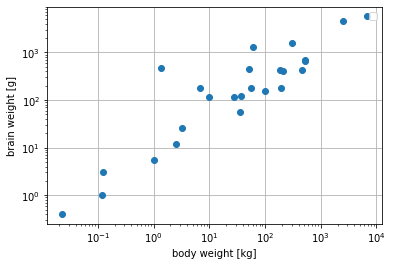

In [55]:
#plt.semilogy(x,y, 'x')
#plt.semilogx(x,y, 'x')
plt.plot(x, y, 'o')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('body weight [kg]')
plt.ylabel('brain weight [g]')
plt.grid(True)
plt.show()

### Purely numerical data: Reading in and plotting

Is the data purely numeric, one uses the much simpler command `np.loadtxt()`.

Now, the text file "brainWeight2.txt" must be in your working directory, which lists the brain weight of mammals (in g) and the body weight (in Kg) in columns 2 and 3. You can find thsi file also [here](http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt).

In [ ]:
# Reading in a column based numerical file
filename = "brainWeight2.txt"           # File name
data = np.loadtxt(filename, skiprows=3) # Load content of the file into matrix 'data'
                                        # first three lines are neglected

In [ ]:
# data is an array, consisting of rows and columns of the read data set
#data

In [ ]:
x = data[:,2]                           # third column (body weight) 
y = data[:,1]                           # second column

In [ ]:
np.max(y), np.min(y) # find the maximum and minimum

In [ ]:
plt.plot(x,y,'o')

#plt.loglog(x, y, 'o',label='mammal data')
#plt.loglog(x,9*x**0.75, label='fit')
#plt.legend()
plt.xlabel('body weight [kg]')
plt.ylabel('brain weight [g]')
plt.grid(True)
plt.show()


Two data sets for own experiments...

### Multidimensional Data: Crime in the USA (FBI, 1997 - 2016)

[Crime in the USA, 1997-2016](https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/tables/table-1)

In [ ]:
filename = "FBI_crimeUSA.dat"
data = np.loadtxt(filename, skiprows=22)
x   = data[:,0]  # year
y1  = data[:,1]  # population
y2  = data[:,2]  # violent crime
y4  = data[:,4]  # murder
y8  = data[:,8]  # rape (legacy_definition)
y10 = data[:,10] # robbery
y12 = data[:,12] # assault
y14 = data[:,14] # property crime
y16 = data[:,16] # burglary
y18 = data[:,18] # larcency theft
y20 = data[:,20] # vehicle theft

In [ ]:
#plt.plot(x, y1, label='population')
plt.plot(x, y2, '.') # violent crime
plt.plot(x, y4+y8+y10+y12)
#plt.legend()
plt.show()

In [ ]:
plt.plot(x, y1, '.') # correlation year - population
#plt.plot(y2, y14, '.') # correlation violent crime - property crime
#plt.plot(y20, y16, '.')

#plt.legend()
plt.show()

In [ ]:
filename = "people.txt"
data = np.loadtxt(filename, skiprows=5)
x   = data[:,0]  # index
y1  = data[:,1]  # inhabitants
y2  = data[:,2]  # percent with income below $5000
y3  = data[:,3]  # percent unemployed
y4  = data[:,4]  # murder per annum and 1 Mio inhabitants


In [ ]:
plt.plot(y2,y4,'o')
plt.show()

### Save data in a file

With the command `np.savetxt` this is simirlarly simple as for reading. Here again, you can omit the explicit opening or closing of the file.

In [ ]:
# Create an example table (as NumPy array)
a = np.arange(10).reshape(5,2)
a

In [ ]:
# Save to disk
np.savetxt('sample.txt', a, delimiter=',', fmt='%.1f')   # now in form of CSV data (comma separated)

In [ ]:
data = np.loadtxt("sample.txt", delimiter=',') # give delimiter, as now CSV
data